In [38]:
import copy
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202310b.nc')

In [22]:
iprob = 299-1
jprob = 348-1
delta = 2

[[ 51.     102.1875 178.3125 199.5625 212.3125]
 [ 82.375  107.3125 108.875  174.4375 203.5625]
 [164.8125 202.5625 148.     117.8125 184.0625]
 [190.1875 224.375  230.25   170.1875 135.5   ]
 [188.3125 224.3125 216.6875 216.375  192.9375]]


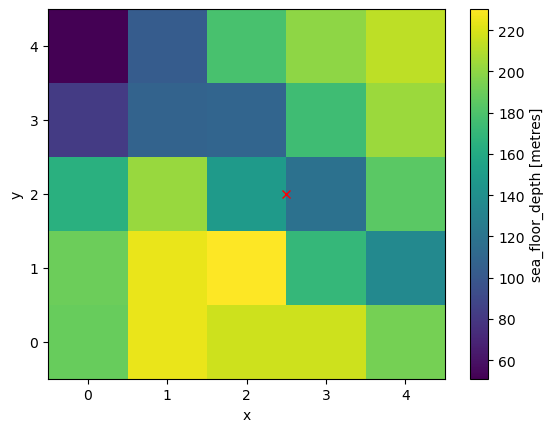

In [35]:
bathy.Bathymetry[jprob-delta:jprob+delta+1, iprob-delta:iprob+delta+1].plot()
plt.plot(delta+0.5, delta, 'rx');
print (bathy.Bathymetry[jprob+delta:jprob-delta-1:-1, iprob-delta:iprob+delta+1].values)

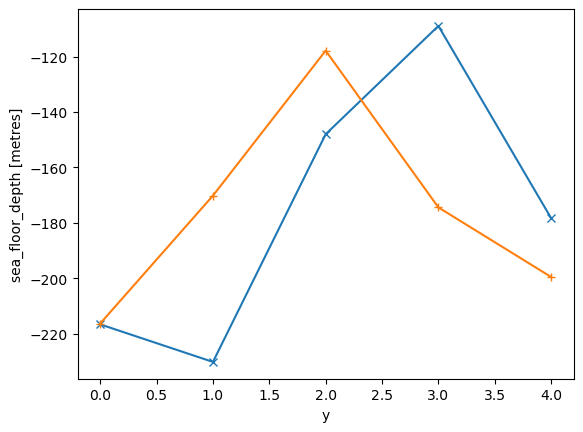

In [36]:
(-bathy.Bathymetry[jprob-delta:jprob+delta+1, iprob]).plot(marker='x');
(-bathy.Bathymetry[jprob-delta:jprob+delta+1, iprob+1]).plot(marker='+');

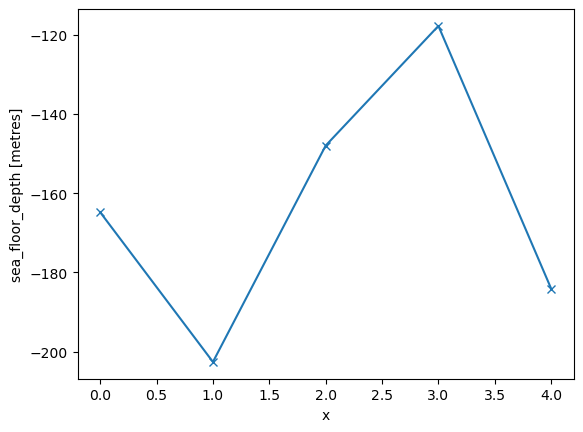

In [37]:
(-bathy.Bathymetry[jprob, iprob-delta:iprob+delta+1]).plot(marker='x');

In [39]:
new_bathy = copy.copy(bathy)

In [40]:
print (new_bathy.Bathymetry[jprob+delta:jprob-delta-1:-1, iprob-delta:iprob+delta+1].values)

[[ 51.     102.1875 178.3125 199.5625 212.3125]
 [ 82.375  107.3125 108.875  174.4375 203.5625]
 [164.8125 202.5625 148.     117.8125 184.0625]
 [190.1875 224.375  230.25   170.1875 135.5   ]
 [188.3125 224.3125 216.6875 216.375  192.9375]]


In [42]:
print (new_bathy.Bathymetry[jprob, iprob-1].values)

202.5625


In [44]:
new_bathy.Bathymetry[jprob, iprob-1] = 191.31 # 5 m thick bottom cell

In [45]:
print (new_bathy.Bathymetry[jprob, iprob-1].values)

191.31


[[ 51.     102.1875 178.3125 199.5625 212.3125]
 [ 82.375  107.3125 108.875  174.4375 203.5625]
 [164.8125 191.31   148.     117.8125 184.0625]
 [190.1875 224.375  230.25   170.1875 135.5   ]
 [188.3125 224.3125 216.6875 216.375  192.9375]]


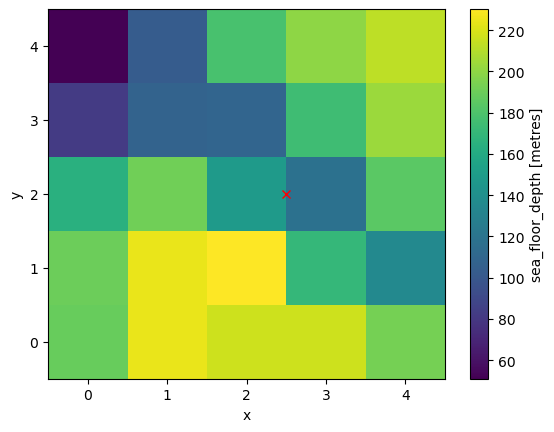

In [46]:
new_bathy.Bathymetry[jprob-delta:jprob+delta+1, iprob-delta:iprob+delta+1].plot()
plt.plot(delta+0.5, delta, 'rx');
print (new_bathy.Bathymetry[jprob+delta:jprob-delta-1:-1, iprob-delta:iprob+delta+1].values)

In [47]:
new_bathy.attrs

{'Conventions': 'CF-1.6',
 'title': 'Bathymetry 202310b',
 'institution': 'Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia',
 'source': '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry-deepen-SI-Sill.ipynb',
 'references': '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc',
 'history': '[2023-10-31 14:27:35] Created netCDF4 zlib=True dataset.',
 'comment': 'Bathymetry processed 202310 Bathymetry. Deepen the deep of Victoria Sill'}

In [50]:
new_bathy.attrs['history'] = new_bathy.attrs['history'] + '[2024-11-08] Shallow one point of 202310b for stability'

In [51]:
new_bathy.attrs['title'] = 'Bathymetry 202411'

In [52]:
new_bathy.attrs

{'Conventions': 'CF-1.6',
 'title': 'Bathymetry 202411',
 'institution': 'Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia',
 'source': '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry-deepen-SI-Sill.ipynb',
 'references': '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc',
 'history': '[2023-10-31 14:27:35] Created netCDF4 zlib=True dataset.[2024-11-08] Shallow one point of 202310b for stability',
 'comment': 'Bathymetry processed 202310 Bathymetry. Deepen the deep of Victoria Sill'}

In [53]:
new_bathy.to_netcdf('/home/sallen/MEOPAR/grid/bathymetry_202411.nc')